![GCAT | Genomes for Life](images/logo-GCAT.png)

# Filter age and birth date

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import *
%matplotlib inline

## Load tables

- MICA
- Participants

In [2]:
mica = pd.read_csv("/home/labs/dnalab/share/lims/R/gcat-cohort/output/export/QUESTIONARI/data.csv", low_memory=False)
participants = pd.read_csv("/home/labs/dnalab/share/lims/R/gcat-cohort/output/export/Participants/data.csv")

all = participants
all = pd.merge(all, mica, on=['entity_id'])

## Select variables of interest

In [3]:
columns = [
    'entity_id',
    'EDAD_ANOS',
    'FECHA_NACIMIENTO_ANO',
    'FECHA_NACIMIENTO_MES',
    'FECHA_NACIMIENTO_DIA',
    'Admin.Participant.birthYear',
    'Admin.Participant.age',
    'Admin.Participant.birthDate',
    'Admin.Interview.startDate',
    'Admin.Interview.status'
]

all = all.ix[:,columns]
filter = all.dropna()

## Calculate different birthdates and ages

In [4]:
days = pd.to_datetime(filter['Admin.Interview.startDate']) - pd.to_datetime(filter['Admin.Participant.birthDate'])
filter['EDAD_ANOS_CALC'] = (days / np.timedelta64(1, 'D')).astype(int)/365.25
filter['EDAD_ANOS_CALC_FLOOR'] = floor(filter['EDAD_ANOS_CALC'])

/software/debian-8/general/virtenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/software/debian-8/general/virtenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
a = filter['FECHA_NACIMIENTO_ANO']*10000 + filter['FECHA_NACIMIENTO_MES']*100 + filter['FECHA_NACIMIENTO_DIA']
a = a.astype(int).astype(str)
filter['FECHA_NACIMIENTO'] = pd.to_datetime(a, format='%Y%m%d', errors='coerce')

days = pd.to_datetime(filter['FECHA_NACIMIENTO']) - pd.to_datetime(filter['Admin.Participant.birthDate'])
days = days / pd.Timedelta(days=1)

filter['DIFF_DAYS'] = days
errors = filter[filter['DIFF_DAYS'] > 1]

/software/debian-8/general/virtenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/software/debian-8/general/virtenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


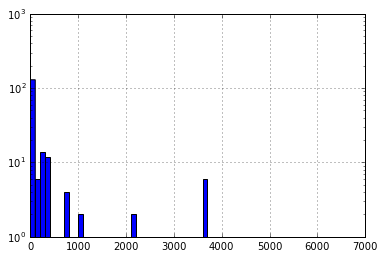

In [6]:
fig, ax = plt.subplots()
days = errors['DIFF_DAYS']
days.hist(bins=range(0, int(max(days)), 100))
ax.set_yscale('log')
plt.show()

## Write errors

In [7]:
errors = filter[filter['DIFF_DAYS'] > 1]
errors.to_csv('../output/age/errors.csv', index=False)

## Write null data

In [8]:
all[~all.entity_id.isin(filter.entity_id)].to_csv('../output/age/na.csv', index=False)

## Write curated data

In [9]:
data = filter.loc[filter['DIFF_DAYS'] < 365]
data[['entity_id', 'EDAD_ANOS', 'FECHA_NACIMIENTO']].to_csv('../output/age/data.csv', index=False)